In [2]:
rm(list = ls()) 
options(stringsAsFactors = F) 

In [4]:
## UCSC xena source 
BRCA.mutect2 = read.table( 'TCGA-BRCA.mutect2_snv.tsv',sep = '\t',header = T)
colnames(BRCA.mutect2)
#read.table()
head(BRCA.mutect2)

[1] "Sample_ID"         "gene"              "chrom"            
 [4] "start"             "end"               "ref"              
 [7] "alt"               "Amino_Acid_Change" "effect"           
[10] "filter"            "dna_vaf"

Sample_ID,gene,chrom,start,end,ref,alt,Amino_Acid_Change,effect,filter,dna_vaf
TCGA-D8-A1XY-01A,USP24,chr1,55159655,55159655,T,C,p.I342V,missense_variant,panel_of_normals,0.4024390
TCGA-D8-A1XY-01A,ERICH3,chr1,74571494,74571494,C,T,p.E1406K,missense_variant,PASS,0.5116279
TCGA-D8-A1XY-01A,KIF26B,chr1,245419680,245419680,G,T,p.S367S,synonymous_variant,PASS,0.6588235
TCGA-D8-A1XY-01A,USP34,chr2,61189055,61189055,G,C,p.L3296L,synonymous_variant,PASS,0.2348993
TCGA-D8-A1XY-01A,ANTXR1,chr2,69245305,69245305,G,A,p.S505S,synonymous_variant,PASS,0.2395833
TCGA-D8-A1XY-01A,SCN9A,chr2,166199365,166199365,G,A,p.V1758V,synonymous_variant,PASS,0.1866667


In [5]:
# 我们这里并没有区分同义突变和非同义突变
BRCA.mutect2$pos=paste0(BRCA.mutect2$chrom,':',
                        BRCA.mutect2$start,'-',
                        BRCA.mutect2$end)
head(BRCA.mutect2)

Sample_ID,gene,chrom,start,end,ref,alt,Amino_Acid_Change,effect,filter,dna_vaf,pos
TCGA-D8-A1XY-01A,USP24,chr1,55159655,55159655,T,C,p.I342V,missense_variant,panel_of_normals,0.4024390,chr1:55159655-55159655
TCGA-D8-A1XY-01A,ERICH3,chr1,74571494,74571494,C,T,p.E1406K,missense_variant,PASS,0.5116279,chr1:74571494-74571494
TCGA-D8-A1XY-01A,KIF26B,chr1,245419680,245419680,G,T,p.S367S,synonymous_variant,PASS,0.6588235,chr1:245419680-245419680
TCGA-D8-A1XY-01A,USP34,chr2,61189055,61189055,G,C,p.L3296L,synonymous_variant,PASS,0.2348993,chr2:61189055-61189055
TCGA-D8-A1XY-01A,ANTXR1,chr2,69245305,69245305,G,A,p.S505S,synonymous_variant,PASS,0.2395833,chr2:69245305-69245305
TCGA-D8-A1XY-01A,SCN9A,chr2,166199365,166199365,G,A,p.V1758V,synonymous_variant,PASS,0.1866667,chr2:166199365-166199365


In [6]:
head(table(BRCA.mutect2$Sample_ID))


TCGA-3C-AAAU-01A TCGA-3C-AALI-01A TCGA-3C-AALJ-01A TCGA-3C-AALK-01A 
              56              807               69               71 
TCGA-4H-AAAK-01A TCGA-5L-AAT0-01A 
              36              262 

In [7]:
TMB=as.numeric(table(BRCA.mutect2$Sample_ID)/38)
head(TMB)

[1]  1.4736842 21.2368421  1.8157895  1.8684211  0.9473684  6.8947368

In [8]:
dat=data.frame(TMB=log2(TMB+1),BRCA='BRCA')
head(dat)

TMB,BRCA
1.3066613,BRCA
4.4748800,BRCA
1.4935395,BRCA
1.5202568,BRCA
0.9615259,BRCA
2.9808912,BRCA


In [9]:
fivenum(dat$TMB)

[1] 0.03747471 1.05585323 1.39592868 1.95174483 7.57085436

In [11]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/ggpubr")

Loading required package: devtools


ggsci    (NA    -> 2.9  ) [CRAN]
ggsignif (NA    -> 0.5.0) [CRAN]
polynom  (NA    -> 1.3-9) [CRAN]
purrr    (0.3.0 -> 0.3.1) [CRAN]
tidyr    (0.8.2 -> 0.8.3) [CRAN]


Installing 5 packages: ggsci, ggsignif, polynom, purrr, tidyr
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


✔  checking for file ‘/tmp/RtmpfptJaB/remotes5b197cf4654f/kassambara-ggpubr-de26170/DESCRIPTION’ (585ms)
─  preparing ‘ggpubr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (342ms)
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggpubr_0.2.999.tar.gz’
   


Loading required package: ggplot2
Loading required package: magrittr


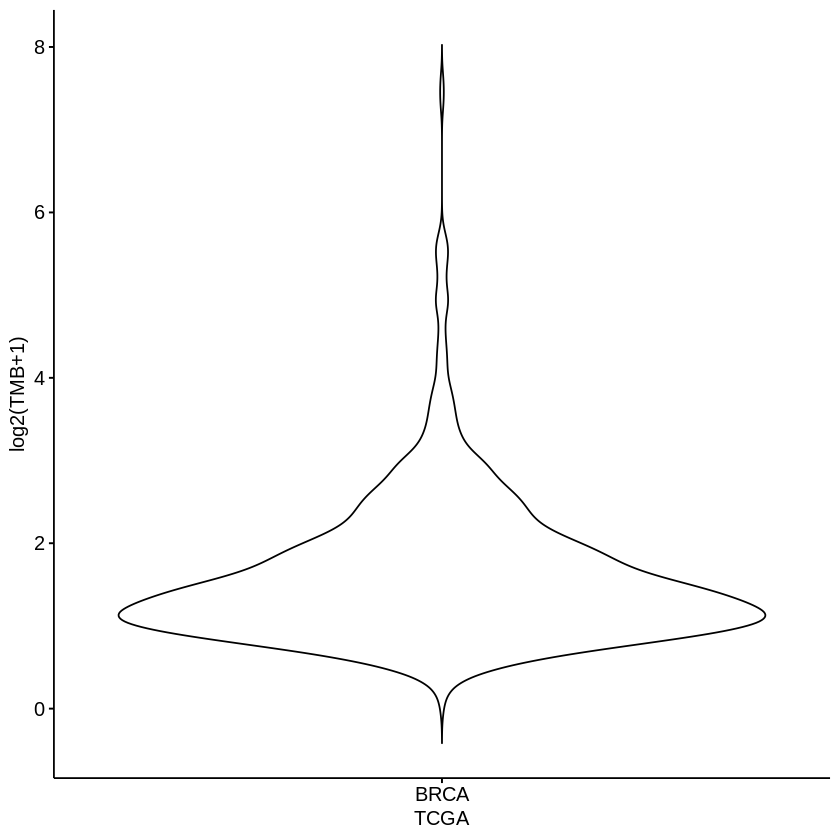

In [12]:
library(ggpubr)
ggviolin(dat,x = 'BRCA',  y = 'TMB',ylab = 'log2(TMB+1)',xlab='TCGA')

# 现在我们开始抽样，我们选择10-300个基因，每10个基因增加这样的panel进行随机抽样算TMB

In [13]:
gl=read.table('gene_length.human.txt')
head(gl) 

V1,V2
DCAF8L1,1802
CWF19L2,2667
TBL1XR1,1531
KCNG4,1558
SPANXN1,217
PPARD,1790


In [14]:
TMB=as.data.frame(table(BRCA.mutect2$Sample_ID)/38)
head(TMB)
allgenes=unique(BRCA.mutect2$gene)

Var1,Freq
TCGA-3C-AAAU-01A,1.4736842
TCGA-3C-AALI-01A,21.2368421
TCGA-3C-AALJ-01A,1.8157895
TCGA-3C-AALK-01A,1.8684211
TCGA-4H-AAAK-01A,0.9473684
TCGA-5L-AAT0-01A,6.8947368


In [15]:
tmp=lapply(seq(10,300,by=10), function(size){
  as.numeric(lapply(1:1000, function(x){
    cg=sample(allgenes,size)
    panle_length=sum(gl[gl[,1] %in% cg,2])/1000000
    small.BRCA.mutect2=BRCA.mutect2[BRCA.mutect2$gene %in% cg,]
    small.TMB=as.data.frame(table(small.BRCA.mutect2$Sample_ID)/panle_length)
    comp=merge(small.TMB, TMB,by='Var1')
     # 第一个问题，这里忽略了很多TMB为0的样本，是否合理
    cor(comp[,2],comp[,3])
      # 第二个问题，计算TMB相关性的时候，我们并没有进行归一化。
  }))
})

Warning message in cor(comp[, 2], comp[, 3]):
“the standard deviation is zero”Warning message in cor(comp[, 2], comp[, 3]):
“the standard deviation is zero”

In [ ]:
head(tmp)

cg = sample(allgenes,10); cg
panle_length=sum(gl[gl[,1] %in% cg,2])/1000000 ; panle_length
small.BRCA.mutect2=BRCA.mutect2[BRCA.mutect2$gene %in% cg,]; nrow(small.BRCA.mutect2)
small.TMB=as.data.frame(table(small.BRCA.mutect2$Sample_ID)/panle_length); nrow(small.TMB);nrow(TMB)
comp=merge(small.TMB, TMB,by='Var1'); head(comp);class(comp);nrow(comp)
cor(comp[,2],comp[,3])


10,0.8294229,0.9203281,0.7184823,0.7219295,0.5743104,0.1463658,0.8576621,0.7098865,0.8324005,0.5919307,⋯,0.9422221,0.8674681,0.8145227,0.9026918,0.5553946,0.5808288,0.6506699,0.5756175,0.5426195,0.7901531
20,0.8266813,0.9379749,0.8490754,0.8128061,0.8708749,0.8830032,0.5740769,0.7192819,0.7905629,0.7604422,⋯,0.8876761,0.8247086,0.7978356,0.8866334,0.9030759,0.6080648,0.8550440,0.8871134,0.8235647,0.9104201
30,0.7141293,0.8959488,0.9036290,0.8645790,0.9153204,0.8984115,0.9208452,0.8833702,0.8980272,0.9170069,⋯,0.8155927,0.8993829,0.8837968,0.8076258,0.9409497,0.7899905,0.9164395,0.8583600,0.8721946,0.6527813
40,0.9102941,0.9260508,0.8324167,0.9046321,0.8808929,0.9163239,0.8539820,0.8283830,0.8830265,0.7885285,⋯,0.8691225,0.8671636,0.8527833,0.8963701,0.9217636,0.8668763,0.9356863,0.8110036,0.9173933,0.9201636
50,0.9288524,0.9047020,0.9079199,0.9341630,0.8936611,0.9398224,0.8428765,0.9409987,0.9428114,0.9337686,⋯,0.9460640,0.9213224,0.9203657,0.9253442,0.8871431,0.9115359,0.8788955,0.9350384,0.9088733,0.8890812
60,0.9219901,0.8977811,0.9306634,0.9124712,0.9067854,0.9183718,0.9383124,0.9386118,0.9170040,0.8511631,⋯,0.8852953,0.9277837,0.9315373,0.9309827,0.8883978,0.8873585,0.9359687,0.9255737,0.8982649,0.9441922


10        20        30        40        50        60        70        80 
       NA 0.8159546 0.8663400 0.8906175 0.9063312 0.9178830 0.9281102 0.9348344 
       90       100       110       120       130       140       150       160 
0.9400668 0.9445681 0.9486313 0.9515732 0.9536676 0.9568898 0.9592315 0.9601738 
      170       180       190       200       210       220       230       240 
0.9626461 0.9638852 0.9654516 0.9662716 0.9678425 0.9689196 0.9698205 0.9710633 
      250       260       270       280       290       300 
0.9717228 0.9727091 0.9736300 0.9745594 0.9750182 0.9754366

10,20,30,40,50,60,70,80,90,100,⋯,210,220,230,240,250,260,270,280,290,300
0.8294229,0.8266813,0.7141293,0.9102941,0.9288524,0.9219901,0.9477465,0.9376283,0.9566349,0.9399506,⋯,0.9726165,0.9722167,0.9733375,0.9797691,0.9730149,0.9678184,0.9677313,0.9714346,0.9749823,0.9786853
0.9203281,0.9379749,0.8959488,0.9260508,0.9047020,0.8977811,0.9306731,0.9198966,0.9293693,0.9422099,⋯,0.9708515,0.9687092,0.9682076,0.9672684,0.9772206,0.9746415,0.9761254,0.9771242,0.9794952,0.9774999
0.7184823,0.8490754,0.9036290,0.8324167,0.9079199,0.9306634,0.9270532,0.9414231,0.9102525,0.9480799,⋯,0.9649458,0.9763129,0.9705573,0.9728587,0.9796235,0.9797518,0.9732961,0.9769201,0.9651984,0.9809152
0.7219295,0.8128061,0.8645790,0.9046321,0.9341630,0.9124712,0.9097445,0.9345172,0.9515922,0.9546968,⋯,0.9680261,0.9776794,0.9700759,0.9612342,0.9728078,0.9609369,0.9782025,0.9780794,0.9756580,0.9760146
0.5743104,0.8708749,0.9153204,0.8808929,0.8936611,0.9067854,0.9218086,0.9285796,0.9587990,0.9503819,⋯,0.9714971,0.9696088,0.9750044,0.9662507,0.9794587,0.9698031,0.9718749,0.9814213,0.9770946,0.9750759
0.1463658,0.8830032,0.8984115,0.9163239,0.9398224,0.9183718,0.9170751,0.9436625,0.9590460,0.9569129,⋯,0.9729265,0.9652364,0.9753745,0.9737934,0.9766670,0.9755036,0.9660118,0.9752656,0.9768856,0.9768842


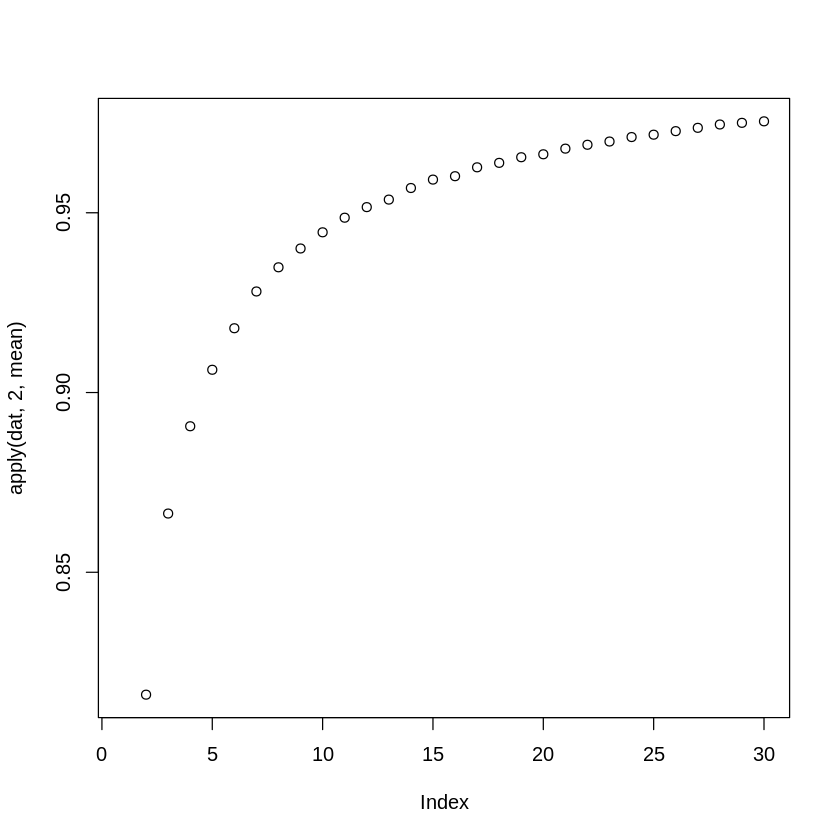

In [28]:
dat=do.call(rbind,tmp)
rownames(dat)=seq(10,300,by=10)
head(dat)
apply(dat, 1, mean )
dat=t(dat)
head(dat)
plot(apply(dat, 2, mean ))


Var1,Var2,value
1,10,0.8294229
2,10,0.9203281
3,10,0.7184823
4,10,0.7219295
5,10,0.5743104
6,10,0.1463658


number_of_genes,cor
10,0.8294229
10,0.9203281
10,0.7184823
10,0.7219295
10,0.5743104
10,0.1463658


Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

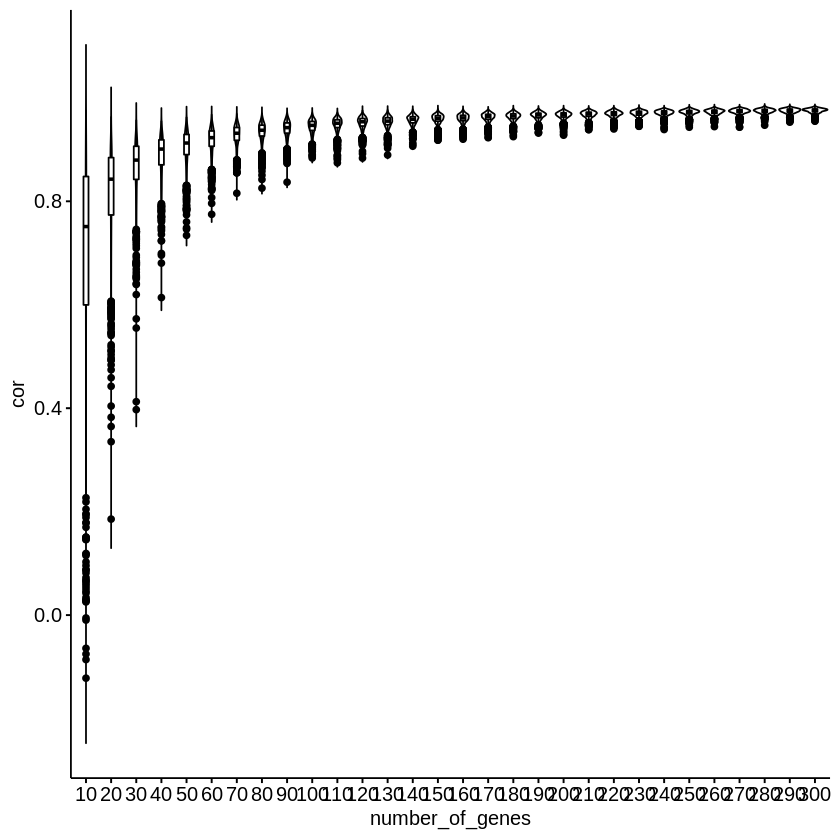

In [32]:
library(reshape2)
df=melt(dat)[,2:3]
head(melt(dat))
colnames(df)=c('number_of_genes','cor')
head(df)
library(ggpubr)
ggviolin(df,x = 'number_of_genes',  y = 'cor',
         add = "boxplot")